# Tutorial on Grover's Algorithm (3)
## Circuit with <i>n</i> qubits Using qiskit's GroverOperator()
***

### The 2023 World Congress in Computer Science, Computer Engineering, & Applied Computing (CSCE'23)
### The 2nd International Conference on Emergent Quantum Technologies (ICEQT'23)

### July 24-27 2023 Las Vegas, NV
By Leon Deligiannidis, Ph.D.,
School of Computing and Data Science,
Wentworth Institute of Technology,
Boston, MA.
***

In [ ]:
!pip install qiskit[visualization]

In [1]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import MCXGate 

print("Imports Successful")

Imports Successful


In [2]:
n_qbits=12

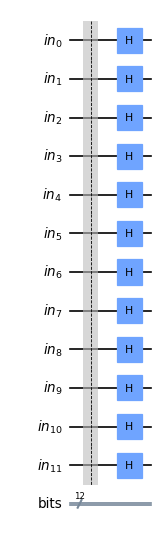

In [3]:
scale=0.6  # scale factor for drawing the circuits

q = QuantumRegister(n_qbits, name='in')    # The input Register
c = ClassicalRegister(n_qbits, "bits")     # The classical register where final result is written to.
circuit= QuantumCircuit(q, c)

circuit.barrier()
circuit.h(q)

circuit.draw('mpl', scale=scale)

In [4]:
def createOracle(s):
    
    o = QuantumCircuit(n_qbits, name='O\nR\nA\nC\nL\nE')
    
    
    
    gate = MCXGate(n_qbits-1)  # Multi-controlled X gate

    
   
    for i in range(n_qbits):
        if s[i] == 0:
            o.x(i) 
    
    #
    # Sandwich X aound H gates to get Z. Z=HXH (and also X=HZH)
    # Replace X with a MC-X gate to build a MC-Z gate
    #
    o.barrier()
    o.h(n_qbits-1)  # the last one, starting from 0.        
    #o.append(gate, [0, 1, 2,   3])
    o.append(gate, list(range(n_qbits)))
    o.h(n_qbits-1)  
    o.barrier()

    # now uncompute
    for i in range(n_qbits):
        if s[i] == 0:
            o.x(i)   
    
       
    o.barrier()
    return o

Searching for string: [1 0 1 1 0 1 0 0 1 1 1 0].


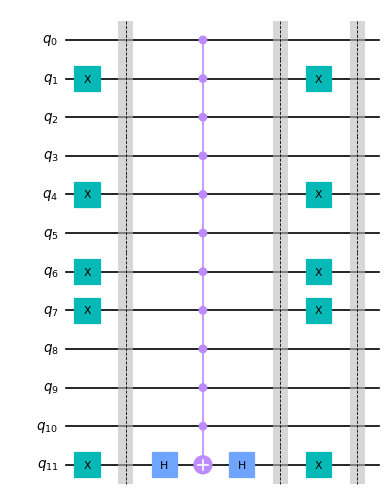

In [5]:
myString = np.random.randint(2, size=n_qbits) 
print(f"Searching for string: {myString}.")

oracle = createOracle(myString)
oracle.draw('mpl', scale=scale)

Number of iterations 50. Total elements in database: 4096


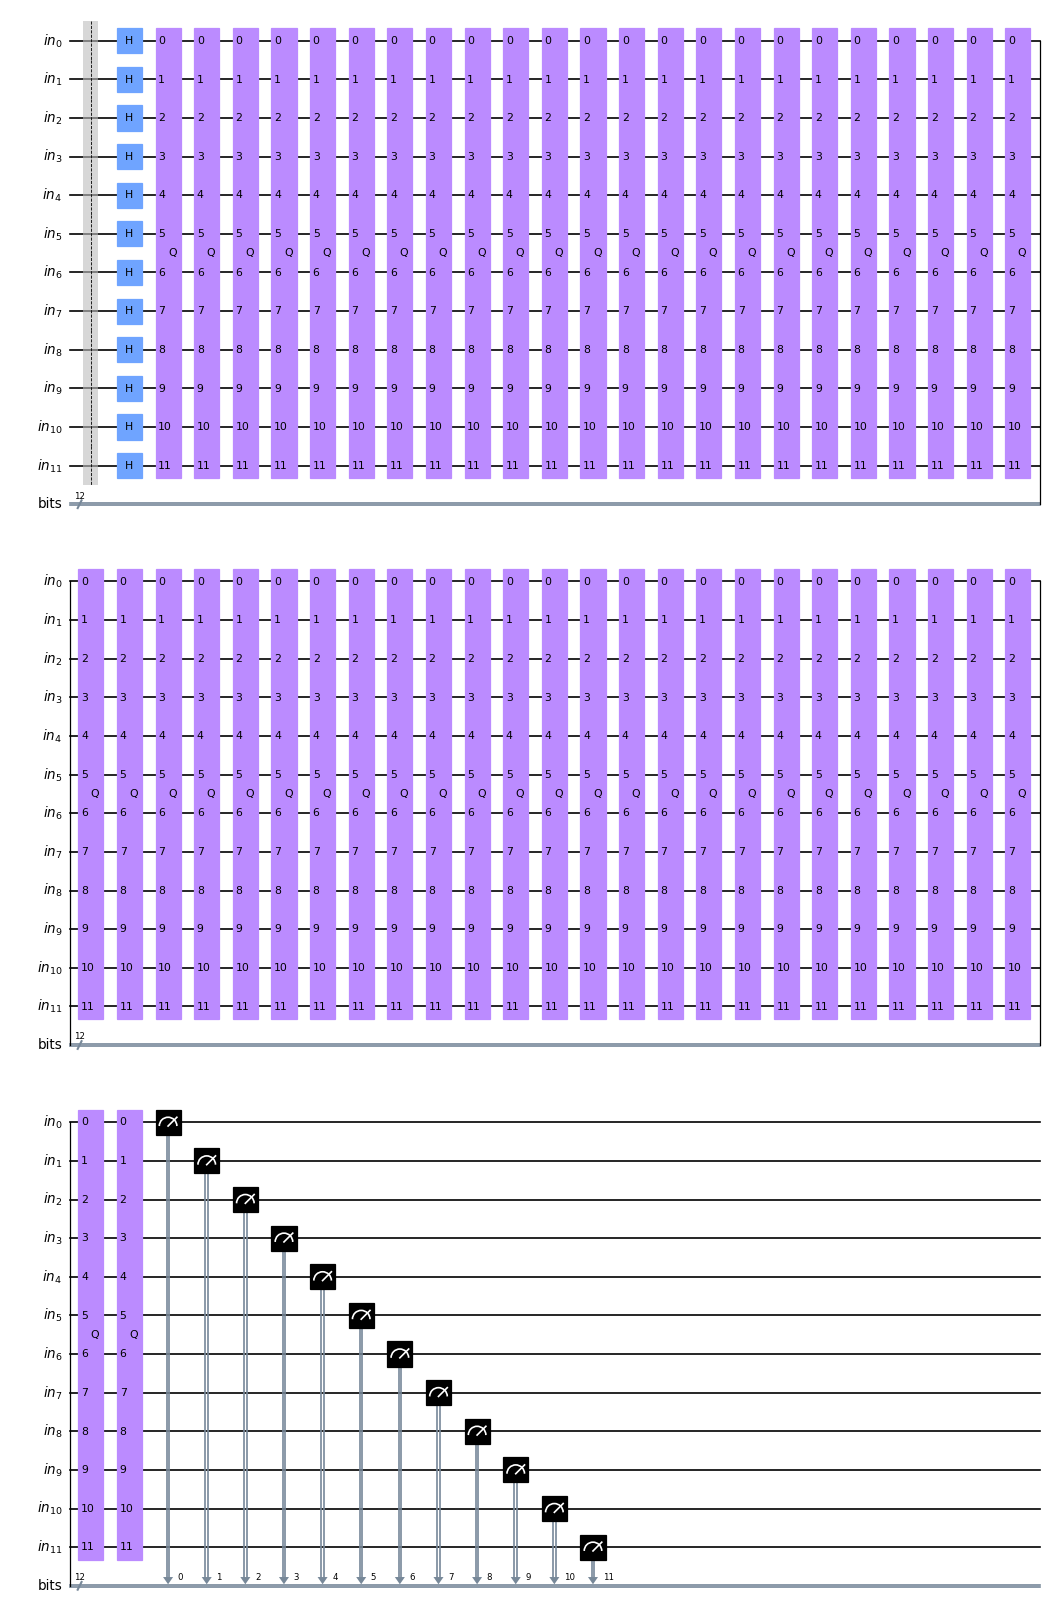

In [6]:
from qiskit.circuit.library import GroverOperator
grover_operator = GroverOperator(oracle, insert_barriers=True)



my_iters=int( (np.pi/4.0) * np.sqrt((2**n_qbits)) )
print(f"Number of iterations {my_iters}. Total elements in database: {2**n_qbits}")

for i in range(my_iters):
    #qc = circuit.compose(grover_operator)
    #circuit.append(grover_operator, list(range(n_qbits)))
    circuit.compose(grover_operator, inplace=True)


#circuit.measure_all()                             # measures all qbits used
circuit.measure(range(n_qbits), range(n_qbits))
circuit.draw('mpl', scale=scale)

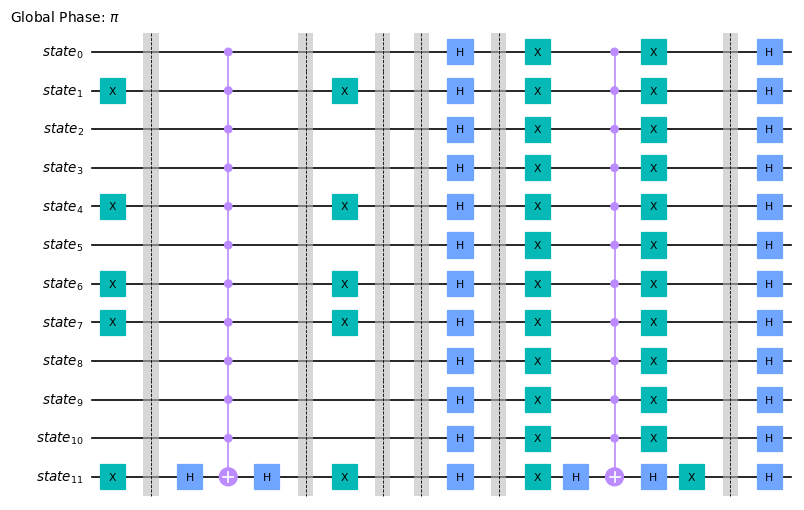

In [7]:
grover_operator.decompose().draw('mpl', scale=scale)

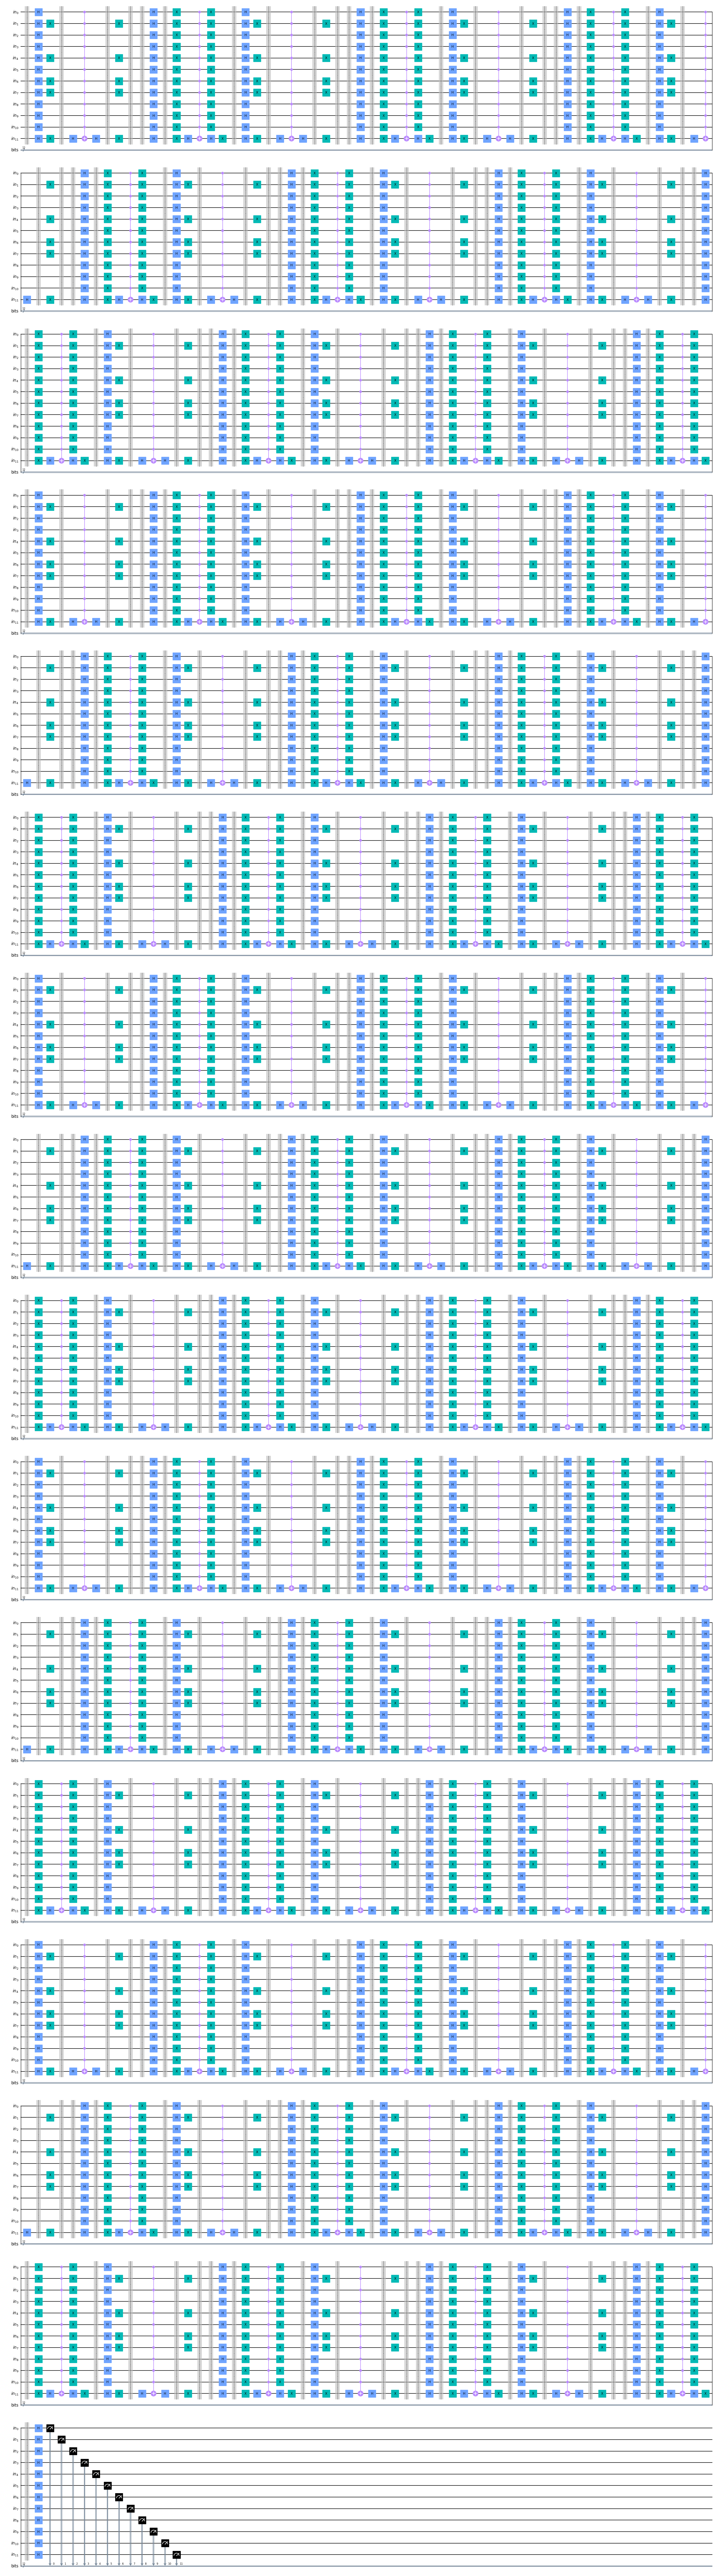

In [8]:
circuit.decompose("Q").draw('mpl', scale=scale, fold=60)

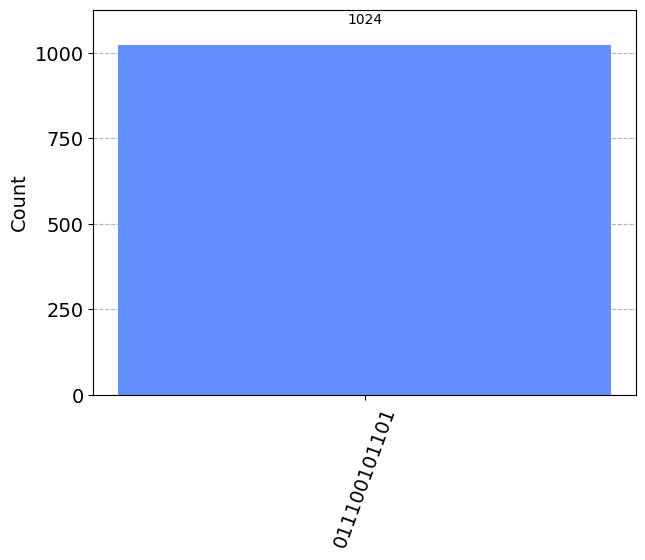

In [9]:
# Simulate the circuit
from qiskit import Aer, transpile
sim = Aer.get_backend('aer_simulator')
t_qc = transpile(circuit, sim)
counts = sim.run(t_qc).result().get_counts()

# plot the results
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [10]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright